In [1]:
%matplotlib inline
%matplotlib notebook

Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [10]:
var = "species"
cond = np.random.rand(len(df))>.2
train = np.where(cond)[0]
test = np.where(~cond)[0]

len(train), len(test)

(124, 26)

In [11]:
train_df = df.iloc[train]
test_df = df.iloc[test]
len(train_df), len(test_df)

(124, 26)

In [13]:
train_y = train_df['species']
train_x = train_df.drop(['species'], axis=1)

In [14]:
test_y = test_df['species']
test_x = test_df.drop(['species'], axis=1)

Train

In [18]:
model = KNeighborsClassifier()
model = model.fit(train_x,train_y)

<IPython.core.display.Javascript object>


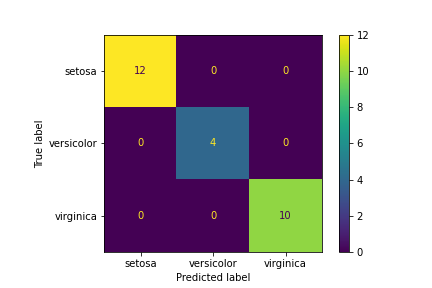

In [19]:
plot_confusion_matrix(estimator=model,X=test_x,y_true=test_y)

In [21]:
std_score = model.score(test_x,test_y)
std_score

1.0

Importance of each feature

In [22]:
data = {'sepal_length':[0], 'sepal_width':[0], 'petal_length':[0], 'petal_width':[0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0,0,0,0


Permutate Sepal Length

In [23]:
test_x.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
7,5.0,3.4,1.5,0.2
9,4.9,3.1,1.5,0.1
13,4.3,3.0,1.1,0.1


In [25]:
test_SPL = test_x.copy()
test_SPL['sepal_length'] = np.random.permutation(test_SPL['sepal_length'])
test_SPL.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.1,3.6,1.4,0.2
5,6.7,3.9,1.7,0.4
7,5.3,3.4,1.5,0.2
9,5.4,3.1,1.5,0.1
13,5.8,3.0,1.1,0.1


In [26]:
model.score(test_SPL,test_y)

0.9615384615384616

In [29]:
feat_imp['sepal_length'] = std_score - model.score(test_SPL,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0,0,0


In [30]:
test_SPW = test_x.copy()
test_SPW['sepal_width'] = np.random.permutation(test_SPW['sepal_width'])
test_SPW.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,2.7,1.4,0.2
5,5.4,2.8,1.7,0.4
7,5.0,3.0,1.5,0.2
9,4.9,2.9,1.5,0.1
13,4.3,3.8,1.1,0.1


In [31]:
model.score(test_SPW,test_y)

1.0

In [32]:
feat_imp['sepal_width'] = std_score - model.score(test_SPW,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0,0


In [33]:
test_PL = test_x.copy()
test_PL['petal_length'] = np.random.permutation(test_PL['petal_length'])
test_PL.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,5.5,0.2
5,5.4,3.9,5.6,0.4
7,5.0,3.4,1.1,0.2
9,4.9,3.1,6.4,0.1
13,4.3,3.0,3.9,0.1


In [34]:
model.score(test_PL,test_y)

0.46153846153846156

In [35]:
feat_imp['petal_length'] = std_score - model.score(test_PL,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0.538462,0


In [36]:
test_PW = test_x.copy()
test_PW['petal_width'] = np.random.permutation(test_PW['petal_width'])
test_PW.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,2.4
5,5.4,3.9,1.7,0.2
7,5.0,3.4,1.5,1.7
9,4.9,3.1,1.5,1.1
13,4.3,3.0,1.1,2.5


In [37]:
model.score(test_PW,test_y)

1.0

In [38]:
feat_imp['petal_width'] = std_score - model.score(test_PW,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0.538462,0.0


Two most important features are sepal_length and petal_length